## mzMD things

Seems to be basically a direct port of MzTree so install and server setup things are exactly the same as they were there. Main difference is in the request format where this one has m and n parameters instead of numpoints:

m (int): the number of points on mz axis (0 for no limit)
n (int): the number of points on rt axis (0 for no limit)

which should both be set to 0 to get all of them (raw data)

`java -jar mzMD-java/target/msDataServer-1.0.jar`

In [1]:
import requests
from requests.exceptions import ConnectionError
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

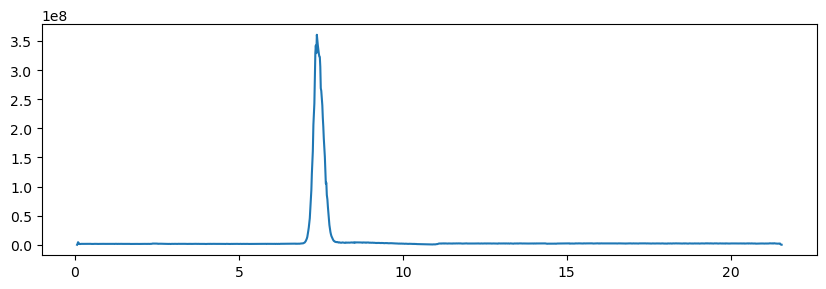

In [2]:
chrom_data = get_chrom_mzMD("http://172.27.178.175:4567", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

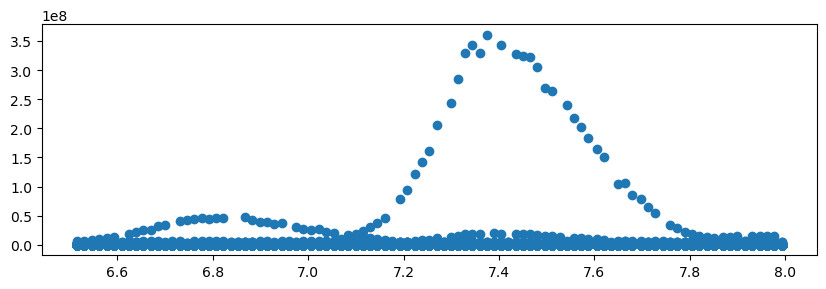

In [3]:
rtrange_data = get_rtrange_mzMD("http://172.27.178.175:4567", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

In [5]:
import timeit
mzmd_chrom = timeit.repeat('get_chrom_mzMD("http://172.27.178.175:4567", 118.0865, 10)', globals=globals(), number=1, repeat=10)
mzmd_rtrange = timeit.repeat('get_rtrange_mzMD("http://172.27.178.175:4567", 6.5, 8)', globals=globals(), number=1, repeat=10)

In [6]:
import pandas as pd
rtrange_df = pd.DataFrame({
    "method": ["mzmd"]*10,
    "time": mzmd_rtrange
})
rtrange_df["metric"] = "rtrange"
chrom_df = pd.DataFrame({
    "method": ["mzmd"]*10,
    "time": mzmd_chrom
})
chrom_df["metric"] = "chrom"

complete_timings = pd.concat([chrom_df, rtrange_df], ignore_index=True)
complete_timings["datetime"] = pd.to_datetime('now')
complete_timings.to_csv("compiled_timings.csv", mode='a', index=False, header=False)